# 少量样本示例的提示词模板
## 1. 使用说明
在构建prompt时，可以通过构建一个少量示例列表去进一步格式化prompt，这是一种简单但强大的指导生成的方式，在某些情况下可以显著提高模型性能。
少量示例提示模板可以由一组示例或一个负责从定义的集合中选择一部分示例的示例选择器构建。
- 前者：使用FewShotPromptTemplate 或 FewShotChatMessagePromptTemplate
- 后者：使用 Example selectors（示例选择器）

举例1：未提供示例的情况

In [2]:
from langchain_openai import ChatOpenAI
import os
import dotenv

dotenv.load_dotenv()    # 加载当前目录下的 .env 文件
os.environ.setdefault("OPENAI_API_KEY", os.getenv("OPENAI_API_KEY"))
os.environ.setdefault("OPENAI_BASE_URL", os.getenv("OPENAI_BASE_URL"))

# 获取对话模型
model = ChatOpenAI(
    model="deepseek-chat",
    temperature=0.7,
    max_tokens=20
)

result = model.invoke("2 👇 9是多少？")
print(result)

content='你写的 “2 👇 9” 可能表示 **2 的 9 次方**，因为“👇”有时用来表示“向下”或“次方”的意思（类似上标）。  \n\n如果是这样：  \n\\[\n2^9 = 2 \\times 2 \\times 2 \\times 2 \\times 2 \\times 2 \\times 2 \\times 2 \\times 2 = 512\n\\]\n\n**答案：512**' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 99, 'prompt_tokens': 11, 'total_tokens': 110, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 11}, 'model_provider': 'openai', 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_eaab8d114b_prod0820_fp8_kvcache', 'id': '84e2d4cd-ca63-4a4a-937a-51398f752813', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--019c1d61-9280-7153-973a-774f62e52a61-0' tool_calls=[] invalid_tool_calls=[] usage_metadata={'input_tokens': 11, 'output_tokens': 99, 'total_tokens': 110, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}}


举例2：使用FewShotPromptTemplate

In [5]:
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate

# 创建一个 PromptTemplate 的实例
example_prompt = PromptTemplate.from_template(
    template="input:{input}\noutput:{output}",
)

# 提供示例
example = [
    {"input": "北京天气怎么样", "output": "北京市"},
    {"input": "南京下雨吗", "output": "南京市"},
    {"input": "西安热吗", "output": "西安市"}
]

# 创建一个 FewShotPromptTemplate 的实例
few_shot_template = FewShotPromptTemplate(
    example_prompt=example_prompt,
    examples=example,
    suffix="input:{input}\noutput:",  # 声明在示例后面的提示词模板
    input_variables=["input"],
)

# 模型调用
from langchain_openai import ChatOpenAI
import os
import dotenv

dotenv.load_dotenv()    # 加载当前目录下的 .env 文件
os.environ.setdefault("OPENAI_API_KEY", os.getenv("OPENAI_API_KEY"))
os.environ.setdefault("OPENAI_BASE_URL", os.getenv("OPENAI_BASE_URL"))

# 获取对话模型
model = ChatOpenAI(
    model="deepseek-chat",
    temperature=0.7,
    max_tokens=20
)

result = model.invoke(few_shot_template.invoke({"input":"天津会下雨吗？"}))
print(result)

content='天津市' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 1, 'prompt_tokens': 43, 'total_tokens': 44, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 43}, 'model_provider': 'openai', 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_eaab8d114b_prod0820_fp8_kvcache', 'id': 'b3b5f7c4-9727-4f54-af54-3c707faf2e09', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--019c1d6b-05f1-7f13-bcfe-52800d564071-0' tool_calls=[] invalid_tool_calls=[] usage_metadata={'input_tokens': 43, 'output_tokens': 1, 'total_tokens': 44, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}}


举例3：

In [1]:
#1、创建提示模板
from langchain_core.prompts import PromptTemplate

# 创建提示模板，配置一个提示模板，将一个示例格式化为字符串
prompt_template = "你是一个数学专家,算式： {input} 值： {output} 使用： {description} "
# 这是一个提示模板，用于设置每个示例的格式
prompt_sample = PromptTemplate.from_template(prompt_template)
#2、提供示例
examples = [
    {"input": "2+2", "output": "4", "description": "加法运算"},
    {"input": "5-2", "output": "3", "description": "减法运算"},
]
#3、创建一个FewShotPromptTemplate对象
from langchain_core.prompts.few_shot import FewShotPromptTemplate

prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=prompt_sample,
    suffix="你是一个数学专家,算式: {input} 值: {output}",
    input_variables=["input", "output"]
)
print(prompt.invoke({"input": "2*5", "output": "10"}))
#4、初始化大模型，然后调用
import os
import dotenv
from langchain_openai import ChatOpenAI

dotenv.load_dotenv()
os.environ.setdefault("OPENAI_API_KEY", os.getenv("OPENAI_API_KEY"))
os.environ.setdefault("OPENAI_BASE_URL", os.getenv("OPENAI_BASE_URL"))
chat_model = ChatOpenAI(
    model="deepseek-chat",
    temperature=0.7,
    max_tokens=20
)
result = chat_model.invoke(prompt.invoke({"input": "2*5", "output": "10"}))
print(result.content)  # 使用: 乘法运算

E:\shangdj\python\env\conda\envs\myPython3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


text='你是一个数学专家,算式： 2+2 值： 4 使用： 加法运算 \n\n你是一个数学专家,算式： 5-2 值： 3 使用： 减法运算 \n\n你是一个数学专家,算式: 2*5 值: 10'
你是一个数学专家，算式： 2×5 值： 10 使用： 乘法运算


# 2. FewShotChatMessagePromptTemplate 的使用
除了 FewShotPromptTemplate 之外，FewShotChatMessagePromptTemplate 是专门为聊天对话场景设计的少样本（few-shot）提示模板，它继承自 FewShotPromptTemplate，但针对聊天消息的格式进行了优化

举例1：实例化

In [1]:
# 举例1
from langchain_core.prompts import (FewShotChatMessagePromptTemplate,
                               ChatPromptTemplate
                               )

# 1.示例消息格式
examples = [
	{"input": "1+1等于几？", "output": "1+1等于2"},
	{"input": "法国的首都是？", "output": "巴黎"}
]

# 2.定义示例的消息格式提示词模版
msg_example_prompt = ChatPromptTemplate.from_messages([
	("human", "{input}"),
	("ai", "{output}"),
])

# 3.定义FewShotChatMessagePromptTemplate对象
few_shot_prompt = FewShotChatMessagePromptTemplate(
	example_prompt=msg_example_prompt,
	examples=examples
)

# 4.输出格式化后的消息
print(few_shot_prompt.format())


E:\shangdj\python\env\conda\envs\myPython3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Human: 1+1等于几？
AI: 1+1等于2
Human: 法国的首都是？
AI: 巴黎


举例2：

In [2]:
# 举例2
# 1.导入相关包
from langchain_core.prompts import (FewShotChatMessagePromptTemplate,
                                    ChatPromptTemplate)

# 2.定义示例组
examples = [
	{"input": "2🦜2", "output": "4"},
	{"input": "2🦜3", "output": "8"},
]
# 3.定义示例的消息格式提示词模版
example_prompt = ChatPromptTemplate.from_messages([
	('human', '{input} 是多少?'),
	('ai', '{output}')
])
# 4.定义FewShotChatMessagePromptTemplate对象
few_shot_prompt = FewShotChatMessagePromptTemplate(
	examples=examples,  # 示例组
	example_prompt=example_prompt,  # 示例提示词词模版
)
# 5.输出完整提示词的消息模版
final_prompt = ChatPromptTemplate.from_messages(
	[
		('system', '你是一个数学奇才'),
		few_shot_prompt,
		('human', '{input}'),
	]
)
#6.提供大模型
import os
import dotenv
from langchain_openai import ChatOpenAI

dotenv.load_dotenv()
os.environ.setdefault("OPENAI_API_KEY", os.getenv("OPENAI_API_KEY"))
os.environ.setdefault("OPENAI_BASE_URL", os.getenv("OPENAI_BASE_URL"))
chat_model = ChatOpenAI(
    model="deepseek-chat",
    temperature=0.7,
    max_tokens=20
)
chat_model.invoke(final_prompt.invoke(input="2🦜4")).content

'16'

# 3. Example selectors (示例选择器)
前面 FewShotPromptTemplate 的特点是，无论输入什么问题，都会包含全部示例。在实际开发中，我们可以根据当前输入，使用示例选择器，从大量候选示例中选取最相关的示例子集。
使用的好处：避免盲目传递所有示例，减少token消耗的同时，还可以提升输出效果
示例选择策略：语义相似选择，长度选择，最大边际相关示例选择等
- 语义相似选择：通过余弦相似度等度量方式评估语义相关性，选择与输入问题最相似的k个示例
- 长度选择：根据输入文本的长度，从候选实例中筛选长度最匹配的示例。
- 最大边际相关示例选择：优先选择与输入问题语义相似的示例，同时，通过惩罚机制避免返回同质化的内容
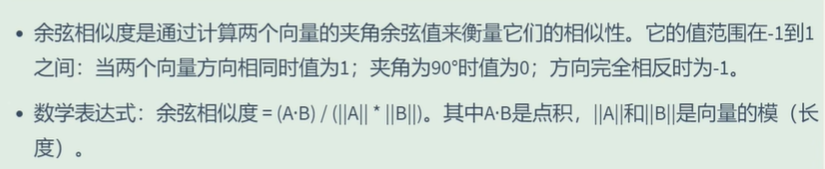

In [1]:
# 举例1
# 1.导入相关包
from langchain_core.example_selectors import SemanticSimilarityExampleSelector
import os
import dotenv
from langchain_openai import OpenAIEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma


dotenv.load_dotenv()

# 2.定义嵌入模型
embeddings_model = HuggingFaceEmbeddings(model=r"E:\shangdj\python\rag\model_dir\BAAI\bge-large-zh-v1___5")


# 3.定义示例组
examples = [
	{
		"question": "谁活得更久，穆罕默德·阿里还是艾伦·图灵?",
		"answer": """
接下来还需要问什么问题吗？
追问：穆罕默德·阿里去世时多大年纪？
中间答案：穆罕默德·阿里去世时享年74岁。
""",
	},
	{
		"question": "craigslist的创始人是什么时候出生的？",
		"answer": """
接下来还需要问什么问题吗？
追问：谁是craigslist的创始人？
中级答案：Craigslist是由克雷格·纽马克创立的。
""",
	},
	{
		"question": "谁是乔治·华盛顿的外祖父？",
		"answer": """
接下来还需要问什么问题吗？
追问：谁是乔治·华盛顿的母亲？
中间答案：乔治·华盛顿的母亲是玛丽·鲍尔·华盛顿。
""",
	},
	{
		"question": "《大白鲨》和《皇家赌场》的导演都来自同一个国家吗？",
		"answer": """
接下来还需要问什么问题吗？
追问：《大白鲨》的导演是谁？
中级答案：《大白鲨》的导演是史蒂文·斯皮尔伯格。
""",
	},
]
# 4.定义示例选择器
example_selector = SemanticSimilarityExampleSelector.from_examples(
	# 这是可供选择的示例列表
	examples,
	# 这是用于生成嵌入的嵌入类，用于衡量语义相似性
	embeddings_model,
	# 这是用于存储嵌入并进行相似性搜索的 VectorStore 类
	Chroma,
	# 这是要生成的示例数量
	k=1,
)
# 选择与输入最相似的示例
question = "玛丽·鲍尔·华盛顿的父亲是谁?"
selected_examples = example_selector.select_examples({"question": question})
print(f"与输入最相似的示例：{selected_examples}")
# for example in selected_examples:
# print("\n")
# for k, v in example.items():
# print(f"{k}: {v}")

E:\shangdj\python\env\conda\envs\myPython3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 391/391 [00:00<00:00, 931.29it/s, Materializing param=pooler.dense.weight]                               
BertModel LOAD REPORT from: E:\shangdj\python\rag\model_dir\BAAI\bge-large-zh-v1___5
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


与输入最相似的示例：[{'question': '谁是乔治·华盛顿的外祖父？', 'answer': '\n接下来还需要问什么问题吗？\n追问：谁是乔治·华盛顿的母亲？\n中间答案：乔治·华盛顿的母亲是玛丽·鲍尔·华盛顿。\n'}]


In [1]:
# 举例2：结合 FewShotPromptTemplate 使用
# 1.导入相关包
from langchain_community.vectorstores import FAISS
from langchain_core.example_selectors import SemanticSimilarityExampleSelector
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate
from langchain_openai import OpenAIEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings

# 2.定义示例提示词模版
example_prompt = PromptTemplate.from_template(
	template="Input: {input}\nOutput: {output}",
)
# 3.创建一个示例提示词模版
examples = [
	{"input": "高兴", "output": "悲伤"},
	{"input": "高", "output": "矮"},
	{"input": "长", "output": "短"},
	{"input": "精力充沛", "output": "无精打采"},
	{"input": "阳光", "output": "阴暗"},
	{"input": "粗糙", "output": "光滑"},
	{"input": "干燥", "output": "潮湿"},
	{"input": "富裕", "output": "贫穷"},
]
# 4.定义嵌入模型
# embeddings = OpenAIEmbeddings(
# 	model="text-embedding-ada-002"
# )
embeddings = HuggingFaceEmbeddings(model=r"E:\shangdj\python\rag\model_dir\BAAI\bge-large-zh-v1___5")


# 5.创建语义相似性示例选择器
example_selector = SemanticSimilarityExampleSelector.from_examples(
	examples,
	embeddings,
	FAISS,
	k=2,
)
#或者
#example_selector = SemanticSimilarityExampleSelector(
# examples,
# embeddings,
# FAISS,
# k=2
#)
# 6.定义小样本提示词模版
similar_prompt = FewShotPromptTemplate(
	example_selector=example_selector,
	example_prompt=example_prompt,
	prefix="给出每个词组的反义词",
	suffix="Input: {word}\nOutput:",
	input_variables=["word"],
)
response = similar_prompt.invoke({"word": "忧郁"})
print(response.text)

E:\shangdj\python\env\conda\envs\myPython3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 391/391 [00:00<00:00, 995.43it/s, Materializing param=pooler.dense.weight]                                
BertModel LOAD REPORT from: E:\shangdj\python\rag\model_dir\BAAI\bge-large-zh-v1___5
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


给出每个词组的反义词

Input: 高兴
Output: 悲伤

Input: 阳光
Output: 阴暗

Input: 忧郁
Output:
